In [1]:
# Basic
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid', font_scale=1.4)
import warnings
warnings.filterwarnings('ignore')
import time

# Sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold 
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

# Models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold, KFold, cross_val_score, RandomizedSearchCV, train_test_split


In [2]:
train_df=pd.read_csv('train_qWM28Yl.csv')

In [4]:
test_df=pd.read_csv('test_zo1G9sv.csv')

In [5]:
#sample_submission=pd.read_csv('sample_submission_KvRh9Sx.csv')

In [6]:
train_df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


# Work with data
#EDA

In [33]:
test_df.shape

(39063, 43)

In [34]:
train_df.shape

(58592, 44)

In [20]:
#it looks like there is no missing values
test_df.isnull().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

In [58]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [7]:
train_df.isnull().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

In [31]:
#check the area_cluster for train and test set
set(train_df["area_cluster"])==set(test_df['area_cluster'])


True

In [21]:
set(test_df['area_cluster'])

{'C1',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'C15',
 'C16',
 'C17',
 'C18',
 'C19',
 'C2',
 'C20',
 'C21',
 'C22',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9'}

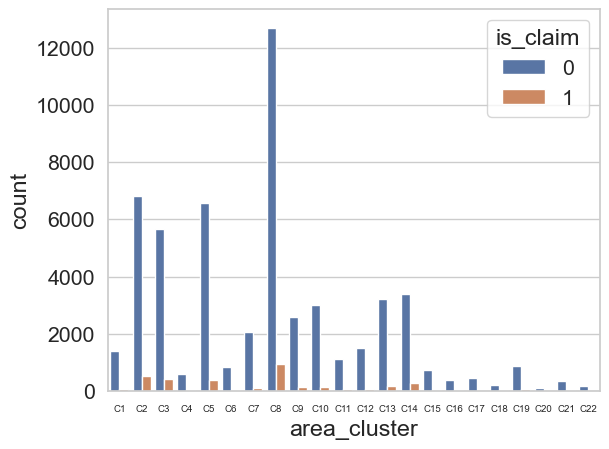

In [18]:
#distribution of area cluster
#here we can see that cluster C8 has the highest count, so it has the highest claim level
ax=sns.countplot(data=train_df, x="area_cluster", hue='is_claim')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
plt.tight_layout()
plt.show()

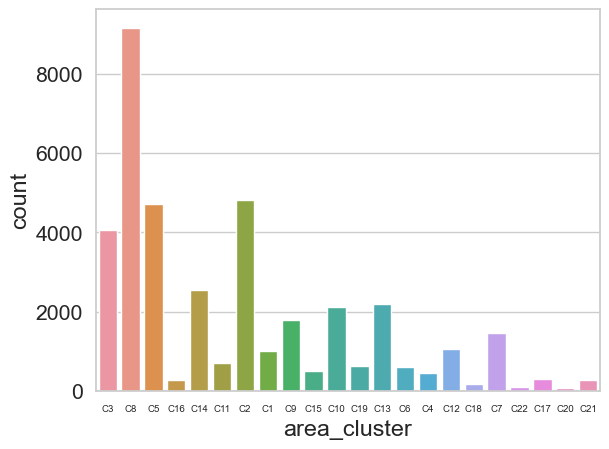

In [36]:
#check the distributions of area_cluster in test set
ax=sns.countplot(data=test_df, x="area_cluster")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
plt.tight_layout()
plt.show()

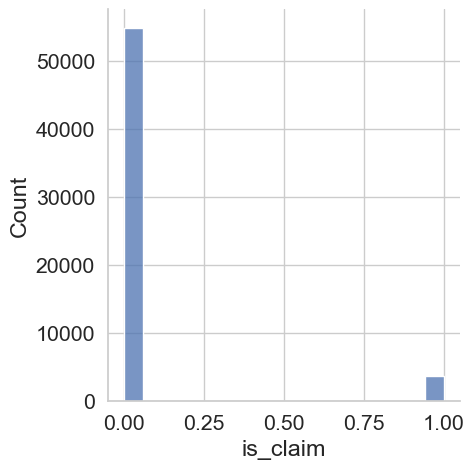

In [12]:
#imbalanced classification
sns.displot(train_df['is_claim'])

In [ ]:
#here we can see that we have imbalanced data 
#and i will use SMOTE and probably underfitting to get a good predictions.

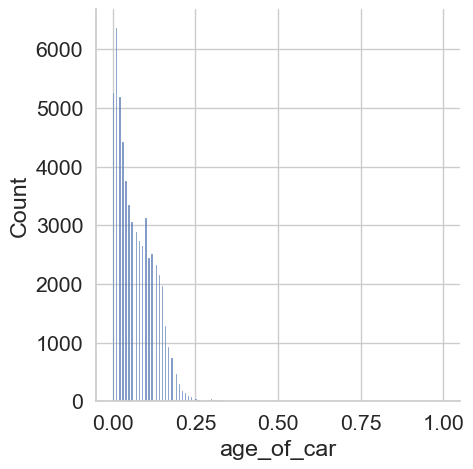

In [41]:
#distribution of age_of_car. Not normal, but it's ok
sns.displot(x='age_of_car', data=train_df)

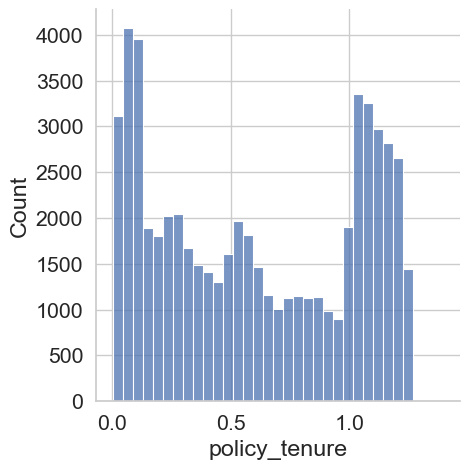

In [42]:
#distribution of policy_tenure
sns.displot(x='policy_tenure', data=train_df)

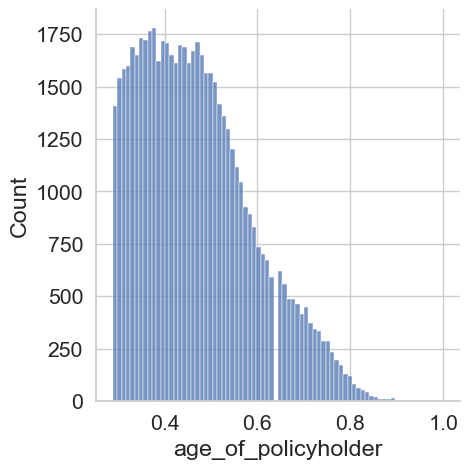

In [169]:
#distribution of age_of_policyholder
sns.displot(x='age_of_policyholder', data=train_df)

In [ ]:
#here i will check for types of classes in categorical features.
# i will use dummy and OHE encodings

In [59]:

set(train_df["segment"])

{'A', 'B1', 'B2', 'C1', 'C2', 'Utility'}

In [60]:
set(train_df["model"])

{'M1', 'M10', 'M11', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9'}

In [61]:
set(train_df["fuel_type"])

{'CNG', 'Diesel', 'Petrol'}

In [87]:
print(set(train_df["max_torque"]))
print(set(test_df['max_torque']))
#max_torque to revolutions_per_minute and torque
# i have created a new feature scaling of max_torque, NM/RPM -> this new feature will show a scale for torque
#the same thing i did with max_power -> new_feature -is a scale of BHP/RPM

{'85Nm@3000rpm', '60Nm@3500rpm', '82.1Nm@3400rpm', '170Nm@4000rpm', '250Nm@2750rpm', '91Nm@4250rpm', '200Nm@1750rpm', '113Nm@4400rpm', '200Nm@3000rpm'}
{'85Nm@3000rpm', '60Nm@3500rpm', '82.1Nm@3400rpm', '170Nm@4000rpm', '250Nm@2750rpm', '91Nm@4250rpm', '200Nm@1750rpm', '113Nm@4400rpm', '200Nm@3000rpm'}


In [95]:
#work with max_torque and max_power
#train and test sets will take new features
def scalar_num(col):
    cats=[]
    for x in col:
        find_pos=str(x).rfind('@')
        val1=int(''.join(filter(str.isdigit, str(x)[:find_pos])))
        val2=int(''.join(filter(str.isdigit, str(x)[find_pos:])))
        cats.append(val1/val2)
    return cats
    
train_df['max_torque_scalar']=scalar_num(train_df['max_torque']) 
train_df['max_power_scalar']=scalar_num(train_df['max_power']) 
test_df['max_torque_scalar']=scalar_num(test_df['max_torque']) 
test_df['max_power_scalar']=scalar_num(test_df['max_power']) 

   

In [114]:
#drop max_torque and max_power features, because they don't need us
train_without_tp=train_df.copy()
test_without_tp=test_df.copy()
train_without_tp.drop(['max_torque','max_power'], axis=1, inplace=True)
test_without_tp.drop(['max_torque','max_power'], axis=1, inplace=True)
train_without_tp.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,max_torque_scalar,max_power_scalar
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0,0.017143,0.672667
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0,0.017143,0.672667
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0,0.017143,0.672667
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0,0.025682,1.475000
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0,0.021412,1.219273


In [123]:
train_without_tp.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,displacement,cylinder,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,max_torque_scalar,max_power_scalar,transmission_type_Manual,rear_brakes_type_Drum
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,F8D Petrol Engine,2,0,0,0,1,0,796,3,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0.017143,0.672667,1,1
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,F8D Petrol Engine,2,0,0,0,1,0,796,3,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0.017143,0.672667,1,1
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,F8D Petrol Engine,2,0,0,0,1,0,796,3,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0.017143,0.672667,1,1
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,1.2 L K12N Dualjet,2,1,1,0,1,1,1197,4,5,Electric,4.8,3995,1735,1515,1335,1,0,0,1,1,1,1,1,1,1,1,1,2,0,0.025682,1.475000,0,1
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,1.0 SCe,2,0,0,0,0,1,999,3,5,Electric,5.0,3731,1579,1490,1155,0,0,0,0,0,1,1,1,0,1,1,1,2,0,0.021412,1.219273,0,1


In [129]:
set(train_df['rear_brakes_type'])

{'Disc', 'Drum'}

In [168]:
set(train_df["engine_type"])

{'1.0 SCe',
 '1.2 L K Series Engine',
 '1.2 L K12N Dualjet',
 '1.5 L U2 CRDi',
 '1.5 Turbocharged Revotorq',
 '1.5 Turbocharged Revotron',
 'F8D Petrol Engine',
 'G12B',
 'K Series Dual jet',
 'K10C',
 'i-DTEC'}

In [122]:
# Dummy work with 'transmission_type' and 'rear_brakes_type'
categorical_cols = ['transmission_type', 'rear_brakes_type']

train_without_tp=pd.get_dummies(train_without_tp, columns=categorical_cols, drop_first=True)
test_without_tp=pd.get_dummies(test_without_tp, columns=categorical_cols, drop_first=True)

In [115]:
#Map  yes to 1 and  No to 0
#work with another categorical features
bools_cols=['is_esc','is_adjustable_steering','is_tpms','is_parking_sensors','is_parking_camera',
            'is_front_fog_lights','is_rear_window_wiper','is_rear_window_washer','is_rear_window_defogger',
           'is_brake_assist','is_power_door_locks','is_central_locking','is_power_steering','is_driver_seat_height_adjustable',
           'is_day_night_rear_view_mirror','is_ecw','is_speed_alert']
def work_with_bools(df, cols):
    for x in cols:
        df[x]=df[x].map({'Yes':1, 'No':0})
        

work_with_bools(train_without_tp, bools_cols)
work_with_bools(test_without_tp, bools_cols)





In [ ]:
#work with categorical features with more than 2 classes.
#Use OnehotEncoder and column transformer

In [134]:

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

cat_cols_to_encode=['area_cluster', 'make', 'segment', 'model', 'fuel_type', 'engine_type', 'steering_type']

def ohe_with_cats(data, categorical_column):
    transformer=make_column_transformer((OneHotEncoder(),categorical_column),remainder="passthrough")
    transformed=transformer.fit_transform(data)
    transformed_df=pd.DataFrame(transformed,columns=transformer.get_feature_names())
    return transformed_df
    
    
train_without_tp=ohe_with_cats(train_without_tp,cat_cols_to_encode)
test_without_tp=ohe_with_cats(test_without_tp,cat_cols_to_encode)





In [136]:
train_without_tp.shape

(58592, 98)

In [137]:
test_without_tp.shape

(39063, 97)

In [110]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 46 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [102]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
train_without_tp.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,max_torque_scalar,max_power_scalar
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0,0.017143,0.672667
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0,0.017143,0.672667
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0,0.017143,0.672667
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0,0.025682,1.475000
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0,0.021412,1.219273


<AxesSubplot: >

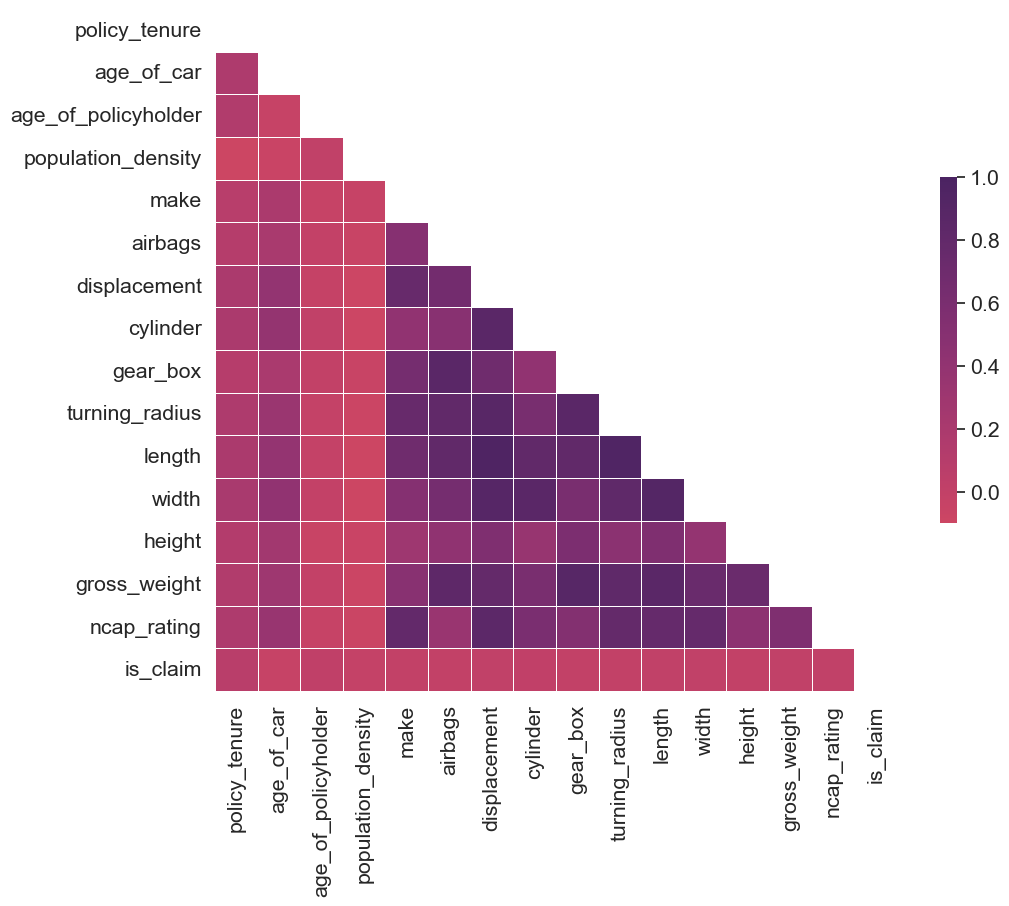

In [46]:
# Compute the correlation matrix
corr = train_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap=sns.color_palette("flare", as_cmap=True)
#cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
#Heatmap shows us a multicollinearity between features
#Looks like there is a high correlation between:
#Displacement and make, airbags
#Gear_box and make, airbags, displacement
#Turning radius and make, airbags, displacement, cylinder, gear_box
#Length and make, airbags, displacement, cylinder, gear_box, turning radius
#Width and make, airbags, displacement, cylinder, gear_box, turning radius, length
#Gross_weight and airbags, displacement, cylinder, gear_box, turning radius, length, width, height
#Ncap_rating and make, displacement,turning radius, length, width


In [146]:
#drop id and dependent feature
X=train_without_tp.drop(['is_claim', 'policy_id'], axis=1)
y=train_without_tp['is_claim']
y=y.astype('int')

In [142]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 96 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   onehotencoder__x0_C1                         58592 non-null  object
 1   onehotencoder__x0_C10                        58592 non-null  object
 2   onehotencoder__x0_C11                        58592 non-null  object
 3   onehotencoder__x0_C12                        58592 non-null  object
 4   onehotencoder__x0_C13                        58592 non-null  object
 5   onehotencoder__x0_C14                        58592 non-null  object
 6   onehotencoder__x0_C15                        58592 non-null  object
 7   onehotencoder__x0_C16                        58592 non-null  object
 8   onehotencoder__x0_C17                        58592 non-null  object
 9   onehotencoder__x0_C18                        58592 non-null  object
 10  onehotenco

In [147]:
#oversample smote and undersample
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


over=SMOTE()
under=RandomUnderSampler()
X_resample, y_resample=over.fit_resample(X,y)
X_res,y_res=under.fit_resample(X_resample, y_resample)


In [ ]:
#split datasets into trainig and validation sets
x_train, x_val, y_train, y_val=train_test_split(X_res, y_res, train_size=0.7, random_state=42)


In [148]:
y.head(25)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    1
13    0
14    0
15    0
16    0
17    0
18    0
19    1
20    0
21    1
22    0
23    1
24    1
Name: is_claim, dtype: int64

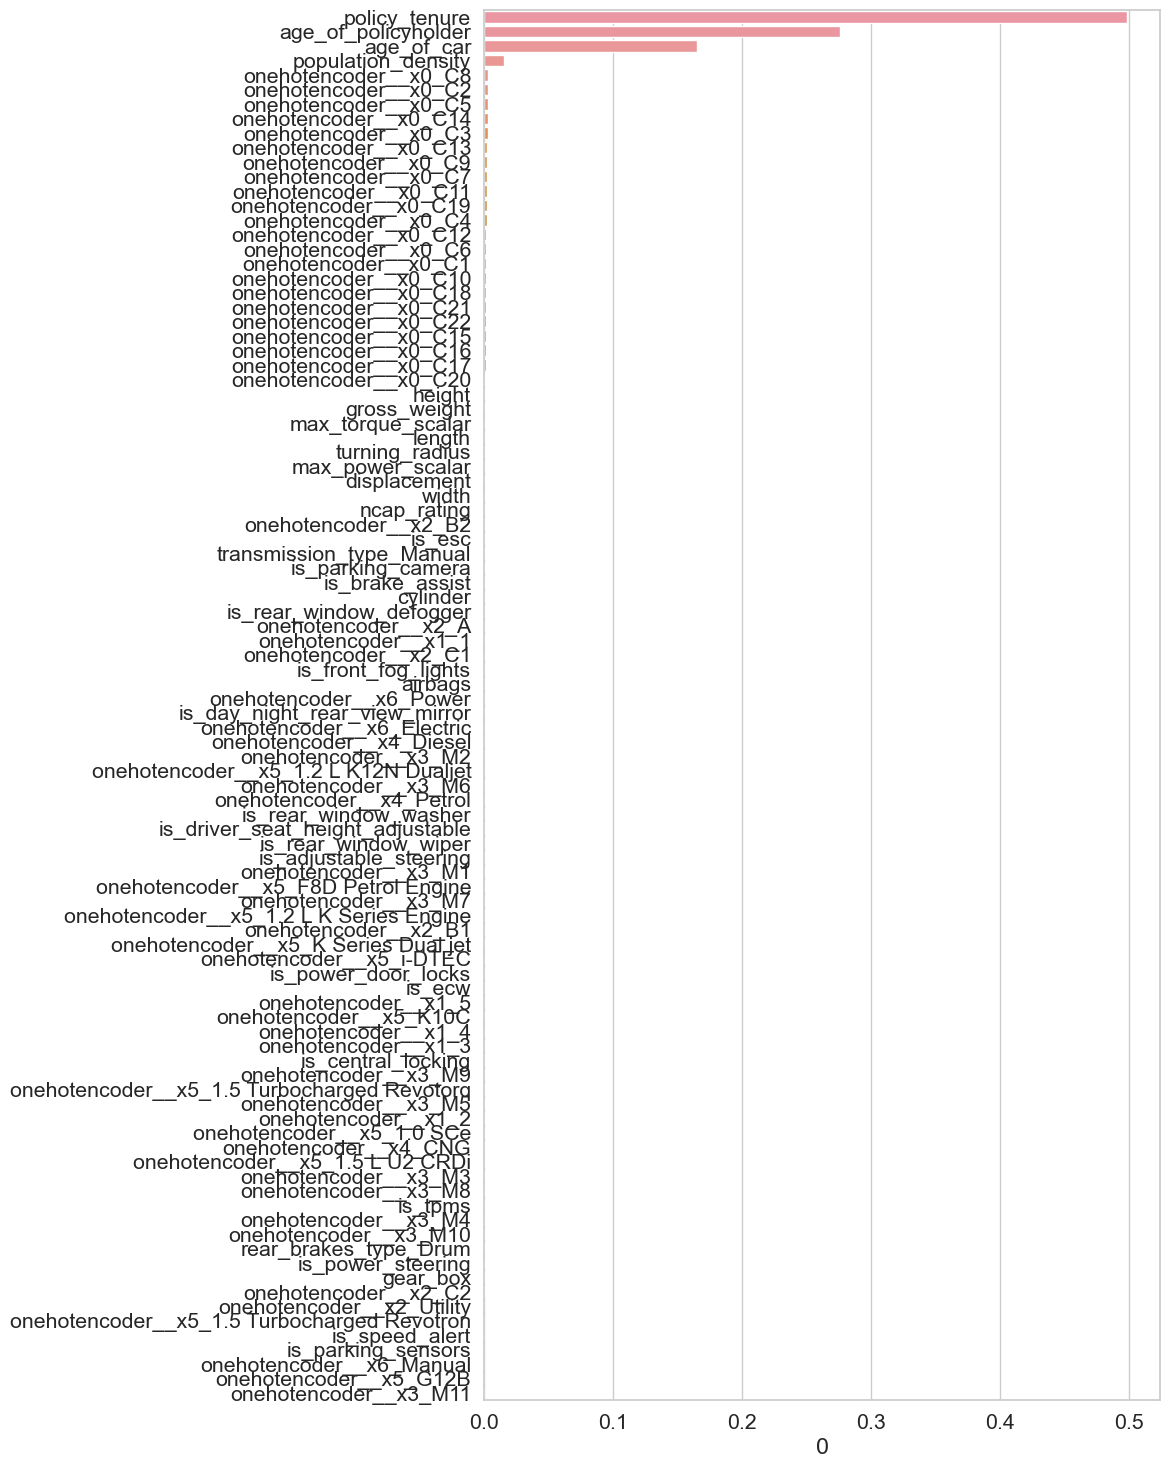

In [149]:
#Using RandomForest find best features to check their influence for the dependent feature
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
# select best features
forest = RandomForestClassifier()
forest.fit(X, y)
feat_imp = pd.DataFrame(forest.feature_importances_, index=X.columns)
feat_imp = feat_imp.sort_values(by=0, ascending=False)

#plot feature importances
plt.figure(figsize=(12,15))
sns.barplot(x=feat_imp[0], y=feat_imp.index)
plt.tight_layout()

train f1-score: 0.8829273442242221
test f1-score: 0.7682053507765756


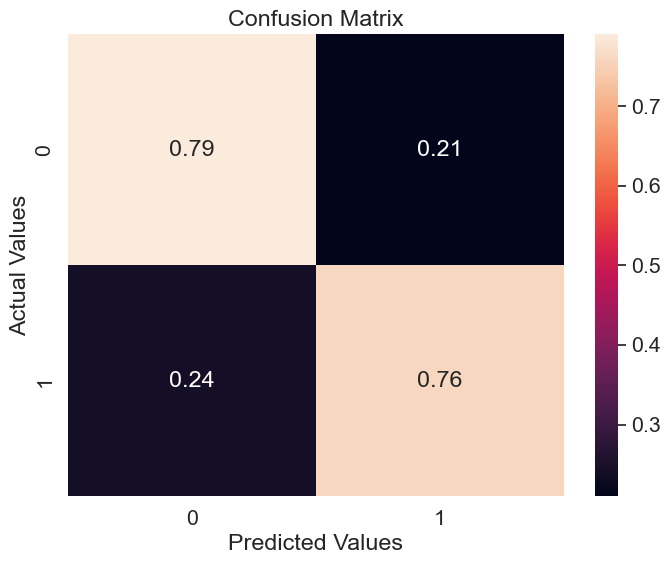

{'splitter': 'random', 'min_samples_split': 6, 'max_features': 'log2', 'max_depth': None}


In [153]:
#decisiontreeclassifier
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
# set parameter range for randomized search
param_distributions = dict(
    #n_estimators = [100, 200, 500],
    splitter=['best', 'random'],
    max_depth = [4, 8, 12, None],
    min_samples_split = [2, 4, 6],
    max_features = ['sqrt', 'log2']
    #max_samples = [0.6, 0.8, 1.0]
    
)

dtree_model = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions=param_distributions, scoring = 'f1', cv=4)
dtree_model.fit(x_train, y_train) # fit the best model on train set


pred_y_tr = dtree_model.predict(x_train) # get model predictions of train set
pred_y_vl = dtree_model.predict(x_val) # get model predictions of test set

#Print the F1 score for train and test sets
print(f"train f1-score: {f1_score(y_train, pred_y_tr)}") 
print(f"test f1-score: {f1_score(y_val, pred_y_vl)}")

cm=confusion_matrix(y_val, pred_y_vl)
cm1=np.round(cm/np.sum(cm, axis=1).reshape(-1, 1), 2)
cm_df = pd.DataFrame(cm1,index = [0,1],columns = [0,1])

#Plotting the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()



print(dtree_model.best_params_)

In [170]:
# Random Forest Classifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
# set parameter range for randomized search
param_distributions = dict(
    n_estimators = [100, 200, 500],
    max_depth = [4, 8, 12, None],
    min_samples_split = [2, 4, 6],
    max_features = ['sqrt', 'log2'],
    max_samples = [0.6, 0.8, 1.0]
    
)


rf2 = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_distributions, scoring = 'f1', cv=4)
rf2.fit(x_train, y_train) # fit the best model on train set

RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [4, 8, 12, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'max_samples': [0.6, 0.8, 1.0],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [100, 200, 500]},
                   scoring='f1')

train f1-score: 0.9901340161963319
test f1-score: 0.9019941634241245


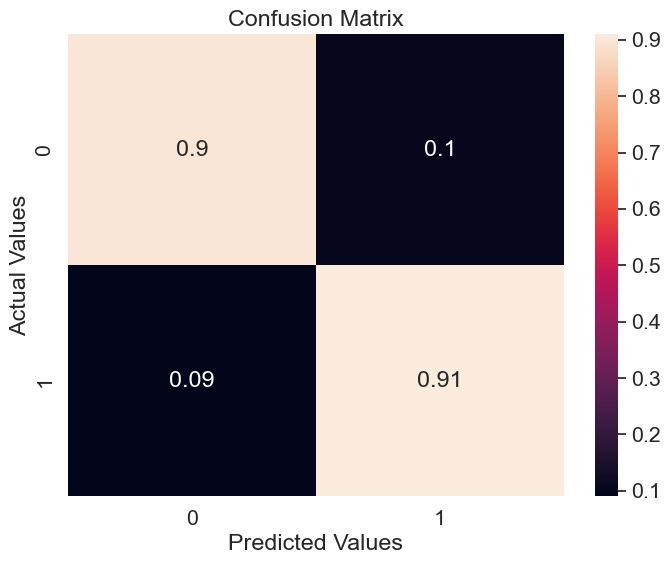

In [171]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
rf_pred_y_tr = rf2.predict(x_train) # get model predictions of train set
rf_pred_y_te = rf2.predict(x_val) # get model predictions of test set

#Print the F1 score for train and test sets
print(f"train f1-score: {f1_score(y_train, rf_pred_y_tr)}") 
print(f"test f1-score: {f1_score(y_val, rf_pred_y_te)}")


cm=confusion_matrix(y_val, rf_pred_y_te)
cm1=np.round(cm/np.sum(cm, axis=1).reshape(-1, 1), 2)
cm_df = pd.DataFrame(cm1,index = [0,1],columns = [0,1])

#Plotting the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()



In [178]:
#Submission results for random forest classifier
y_test_pred = rf2.predict(test_without_tp)
my_sub = pd.DataFrame()
my_sub['policy_id'] = test_ids
my_sub['is_claim'] = y_test_pred
print(my_sub.head())
#load test file
submission = pd.read_csv('sample_submission_KvRh9Sx.csv')
#align test ids in the same order as they are in the test file
submission = submission.merge(my_sub, on='policy_id')
#generate CSV file
submission.to_csv('RandomForestClassifier.csv', index=False)

  policy_id  is_claim
0   ID58593         0
1   ID58594         0
2   ID58595         0
3   ID58596         0
4   ID58597         0


In [173]:
from sklearn.metrics import f1_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

ada_model_2 = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=None),
    n_estimators=500,
    learning_rate=1.5,
    algorithm="SAMME"
)
ada_model_2.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME', base_estimator=DecisionTreeClassifier(),
                   learning_rate=1.5, n_estimators=500)

train f1-score: 1.0
test f1-score: 0.9116013716505326


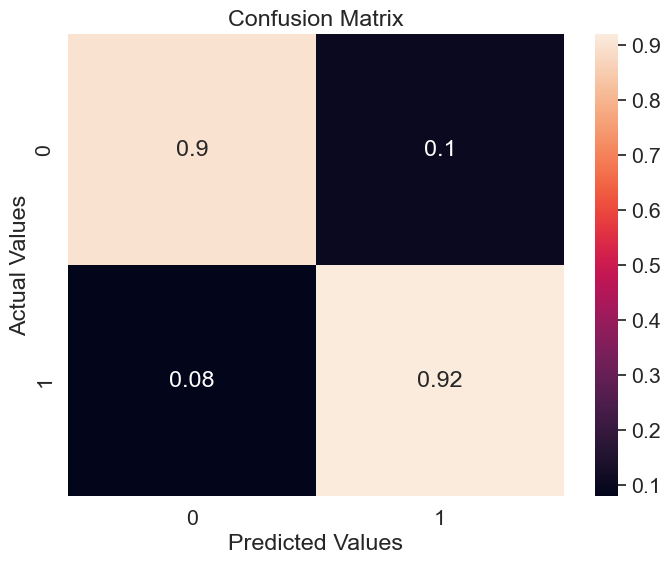

In [174]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
rf_pred_y_tr = ada_model_2.predict(x_train) # get model predictions of train set
rf_pred_y_te = ada_model_2.predict(x_val) # get model predictions of test set

#Print the F1 score for train and test sets
print(f"train f1-score: {f1_score(y_train, rf_pred_y_tr)}") 
print(f"test f1-score: {f1_score(y_val, rf_pred_y_te)}")


cm=confusion_matrix(y_val, rf_pred_y_te)
cm1=np.round(cm/np.sum(cm, axis=1).reshape(-1, 1), 2)
cm_df = pd.DataFrame(cm1,index = [0,1],columns = [0,1])

#Plotting the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [176]:
#Submission results for ada boost model
y_test_pred = ada_model_2.predict(test_without_tp)
my_sub = pd.DataFrame()
my_sub['policy_id'] = test_ids
my_sub['is_claim'] = y_test_pred
print(my_sub.head())
#load test file
submission = pd.read_csv('sample_submission_KvRh9Sx.csv')
#align test ids in the same order as they are in the test file
submission = submission.merge(my_sub, on='policy_id')
#generate CSV file
submission.to_csv('AdaModelClassifier.csv', index=False)

  policy_id  is_claim
0   ID58593         0
1   ID58594         0
2   ID58595         1
3   ID58596         0
4   ID58597         0


In [159]:
#drop policy_id in test set
test_ids=test_without_tp['policy_id']
test_without_tp.drop('policy_id', axis=1, inplace=True)

,policy_id,is_claim
0,ID58593,1
1,ID58594,1
2,ID58595,1
3,ID58596,1
4,ID58597,1


In [177]:
#Submission results decision tree classifier
y_test_pred = dtree_model.predict(test_without_tp)
my_sub = pd.DataFrame()
my_sub['policy_id'] = test_ids
my_sub['is_claim'] = y_test_pred
print(my_sub.head())
#load test file
submission = pd.read_csv('sample_submission_KvRh9Sx.csv')
#align test ids in the same order as they are in the test file
submission = submission.merge(my_sub, on='policy_id')
#generate CSV file
submission.to_csv('DecisionTreeClassifier.csv', index=False)

  policy_id  is_claim
0   ID58593         0
1   ID58594         0
2   ID58595         1
3   ID58596         0
4   ID58597         0
